In [2]:
import pandas as pd
import numpy as np

In [3]:
from collections import Counter

In [5]:
genesis = pd.read_csv('./magazine/final/genesis_adfn_2.csv', sep='|', encoding = 'utf-8')

In [6]:
genesis

,magazine,title,link,date,content,title_brand,word_genesis,ADFN,ADFN_2
0,N,제네시스 GV70 12월 출시...싼타페 실내보다 클까?,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-04,['[이데일리 오토in] 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV...,1,이데일리 오토in 카가이 남현수 기자= 제네시스가 이 달에 중형 SUV GV70을 ...,"['이데일리', '오토', 'in', '남현수', '기자', '제네시스', '달',...","['이데일리', '오토', 'in', '남현수', '기자', '제네시스', '달',..."
1,N,제네시스 'GV70' 곧 출시… 8일 온라인 공개 행사,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-03,"[""현대자동차그룹 고급 브랜드 제네시스의 SUV 'GV70'이 이달 출시된다. 현대...",1,현대자동차그룹 고급 브랜드 제네시스의 SUV GV70이 이달 출시된다. 현대차는 오...,"['현대', '자동차', '그룹', '고급', '브랜드', '제네시스', 'SUV'...","['현대', '자동차', '그룹', '고급', '브랜드', '제네시스', 'SUV'..."
2,N,현대차 수출 단가 대당 2만달러 시대 '초읽기',https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-29,['1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국...,0,1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국산차...,"['1', '∼', '10월', '수출', '단가', '1만', '9천', '386...","['1', '∼', '10월', '수출', '단가', '1만', '9천', '386..."
3,N,"제네시스 GV70, 오는 8일 디지털 공개행사",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-12-02,"['2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시...",1,"2.2ℓ 디젤, 2.5ℓ 가솔린 터보, 3.5ℓ 가솔린 터보 스포츠 모델로 출시 오...","['2.2', 'ℓ', '디젤', '2.5', 'ℓ', '가솔린', '터보', '3...","['2.2', 'ℓ', '디젤', '2.5', 'ℓ', '가솔린', '터보', '3..."
4,N,국산차 수출 단가 2만달러 육박,https://news.naver.com/main/read.nhn?mode=LSD&...,2020-11-30,"['[스포츠경향] 제네시스', '국산차 수출 판매 단가 평균이 2만달러에 육박하는 ...",0,"스포츠경향 제네시스, 세단보다 가격이 높은 SUV 수출이 늘어나며 대당 수출 가격도...","['스포츠경향', '제네시스', '세단', '가격', '높은', 'SUV', '수출...","['스포츠경향', '제네시스', '세단', '가격', '높은', 'SUV', '수출..."
...,...,...,...,...,...,...,...,...,...
1549,N,현대차 제네시스 사업부장에 해외통 이용우 부사장 선임,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-29,['현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 ...,1,현대차는 피츠제럴드 부사장이 이달 초 사임 의사를 사측에 전하면서 이 부사장을 제네...,"['현대차', '피츠제럴드', '부사', '달', '초', '사임', '의사', '...","['현대차', '피츠제럴드', '부사', '달', '초', '사임', '의사', '..."
1550,N,"3년 만에 실적 반등 현대차 ""美 가속페달 더 밟는다""",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-12,"[""그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시장 ...",0,그래픽 유정수 디자인기자 현대자동차(제네시스 브랜드 포함)가 세계 자동차 시장 최대...,"['그래픽', '유정수', '디자인', '기자', '현대', '자동차', '제네시스...","['그래픽', '유정수', '디자인', '기자', '현대', '자동차', '제네시스..."
1551,N,현대·기아차 신형 엔진 공개… ‘GV80’ 첫 장착 유력,https://news.naver.com/main/read.nhn?mode=LSD&...,2019-10-23,['현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스...,1,현대자동차그룹이 23일 신형 대형엔진 2종을 공개했다. 다음달 출시되는 제네시스 첫...,"['자동차', '그룹', '23일', '신형', '대형', '엔진', '2', '종...","['자동차', '그룹', '23일', '신형', '대형', '엔진', '2', '종..."
1552,N,"""이노션, 제네시스 풀 라인업 확보…마케팅 활발해질 것""-NH",https://news.naver.com/main/read.nhn?mode=LSD&...,2020-01-02,"['NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 ""제네시스 풀 라인...",1,NH투자증권은 2일 현대자동차그룹의 광고계열사 이노션에 대해 제네시스 풀 라인업 확...,"['NH', '투자', '증권', '2일', '자동차', '그룹', '광고', '열...","['NH', '투자', '증권', '2일', '자동차', '그룹', '광고', '열..."


In [7]:
type(genesis['ADFN_2'][0])

str

In [309]:
for word in genesis['word_genesis']:
    if '뉴' in word:
        print(word)
        print('-'*50)

1∼10월 수출 단가 1만9천386달러SUV·제네시스 등 고가차량 수출 늘어 국산차 평균 수출 단가 1만7천749달러작년比 10.7%↑, 이는 스포츠유틸리티차(SUV)와 제네시스 수출 비중이 늘어나며 믹스 개선(고부가가치 제품 판매 확대) 효과를 봤기 때문으로 보인다., 현대차는 올해 베뉴, 코나, 투싼, 넥쏘, 싼타페, 팰리세이드, GV80 등 7개 차종의 SUV를 수출했다. 특히 팰리세이드의 수출이 두 배로 늘고, GV80이 새로 가세하며 대형 SUV 수출이 늘었다., 제네시스의 수출 비중도 소폭 증가했다., 올해 10월까지 G70, G80, G90, GV80 등 제네시스 차종이 현대차 전체 수출에서 차지하는 비중은 2.2%로 지난해 같은 기간보다 0.1%포인트 늘어났다. 판매 대수 자체는 1만4천891대에 그쳤지만 고급차 브랜드인 만큼 적은 대수로도 평균 수출 가격을 올린 것으로 보인다., 특히 대형 SUV인 GV80은 연말부터 해외 시장에 본격적으로 판매되면서 수출 단가 상승을 끌어올리는 역할을 할 전망이다. 제네시스는 연말부터 미국, 캐나다, 호주, 중동 등에서 GV80을 시판하고 내년 초에는 러시아에서도 판매를 시작할 예정이다.
--------------------------------------------------
스포츠경향 제네시스, 세단보다 가격이 높은 SUV 수출이 늘어나며 대당 수출 가격도 올랐다. 볼륨별로 보면 올해 베뉴, 코나, 투싼, 넥쏘, 싼타페, 팰리세이드, GV80 등 7개 차종이 인기를 얻었고 이후 팰리세이드의 수출량은 두 배로 뛰어 올랐으며 GV80는 대형 SUV 카테고리에서 주목을 받았다., 한편 올해 10월까지 G70, G80, G90, GV80 등 제네시스 브랜드들이 현대차 전체 수출에서 차지하는 비중은 2.2%로 지난해 같은 기간보다 0.1%포인트 늘었다. 제네시스는 연말부터 미국, 캐나다, 호주, 중동 등에 GV80을 시판하고 내년 초엔 러시아에도 본격 판매를 이어 나간다.
-----------------------

In [310]:
genesis['ADFN'][0][0]

'['

In [35]:
for word in genesis['ADFN_2']:
    if "소음" in word:
        print(word)
        print('-'*50)

['현지', '매체', '럭셔리', 'SUV', '호평', '제네시스', '대형', '스포츠', '유틸리티', '차량', 'SUV', 'GV80', '연내', '미국', '출시', '현지', '사전', '계약', '2만', '대를', '달성', '판매', '전', '인기', '끌', '미국', '자동차', '전문', '매체', '호평', '국내', '고급', '차', '시장', '평정한', '제네시스', '럭셔리', '브랜드', '격전', '지인', '미국', '시장', '공략', '수', '있을지', '주목', '15일', '자동차', '그룹', 'GV80', '미국', '사전', '계약', '물량', '최근', '2만', '대를', '달성', '기존', 'G70', 'G80', 'G90', '지난해', '미국', '판매량', '총', '2만', '1000', '여대', '점', '감안', 'GV80', '대한', '현지', '소비자', '관심', '매우', '높은', '수준', '현대차', '2016년', '미국', '제네시스', 'SUV', '라인업', '없어', '판매', '크게', '데', '한계', '있었다', '미국', '승용차', '시장', 'SUV', '60%', '차지', 'GV80', '지난달', '승', '행사', '참여', '현지', '매체', '호평', '강력한', '엔진', '정숙', '편안한', '주행', '성능', '고급스러운', '실내', '외', '디자인', '시장', '요구', '럭셔리', 'SUV', '게', '전반', '평가', '자동차', '미디어', '모터', '1', '은', '6', '통', '트윈', '터보', '엔진', '대해', '급', '가속', '발생', '매끄러운', '엔진', '음', '세련된', '럭셔리', '자동차', '주행', '경험', '연출', '평가', '현지', '매체', '급', '최고', '실내', '소음', '수준', '주목', '카앤', '드라이버', '시속', '113', 'km'

In [8]:
genesis['ADFN_2'] = genesis['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace('"', '').str.replace("'", "").str.split(', ')

### stopwords

In [21]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [22]:
sw_df.columns = ['stopword']

In [23]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [24]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [25]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [26]:
add_0 = ['수', '은', '있는', '통해', '말', '중', '내', '두', '개', '위', '지난', '부분', 
        '2만', '3.0', '인치', '위해', '이후', '가장', '내년', '1만', '같은', '추가', '인',
        '경우', '지난해' '2.5', '후', '기반', '강조', '전', '대한', '설명', '총', '앞',
        '1', '2', '3', '4', '5', '6', '7','3.5',
        '더', '관계자', '대비', '때문', '19', '정도', '있도록', 'm', '3세대', '기간', '15일', '지난달', 'ℓ', '대해', 
        '지난해', 'km', '1월', '줄', '2.5', '점',
        '시장', '적용', '주행', '변경', '가격', '시스템', '신차', '변경', '예정', '그룹',  '시작', '공장',
        '올해', '고객', '계획', '기존', '계약', '최대', '확대', '발생', '방식', '목표', '수준', '완성']
for w in add_0:
    stop_words.append(w)

In [27]:
# '1', '2', '3', '4', '5', '6', '3.5'

In [28]:
# 소음-> 소음저감

In [29]:
len(stop_words)

748

In [30]:
noun_adj_list = []
for i in range(len(genesis)):
    for word in genesis.loc[i, 'ADFN_2']:
        if word not in stop_words:
            noun_adj_list.append(word)

In [31]:
noun_adj_list

['이데일리',
 '오토',
 'in',
 '남현수',
 '기자',
 '제네시스',
 '달',
 '중형',
 'SUV',
 'GV70',
 '출시',
 '올해',
 '제네시스',
 'GV80',
 'G80',
 'G70',
 '다양한',
 '내수',
 '호평',
 '업계',
 'GV70',
 '달',
 '8~10일',
 '공식',
 '출시',
 'GV70',
 '100',
 '여대',
 '10월',
 '위장',
 '막',
 '도로',
 '활보',
 '노이즈',
 '마케팅',
 '진행',
 'GV70',
 '실물',
 '디자인',
 '접',
 '소비자',
 '제대로',
 '프리미엄',
 'SUV',
 '반응',
 'GV70',
 '제네시스',
 '디자인',
 '아이덴티티',
 '헤드',
 '램프',
 '테',
 '램프',
 '전면',
 '그릴',
 '오각',
 '크레스트',
 '형태',
 '전면',
 '꽉',
 '측면',
 '최근',
 '유행',
 '쿠페',
 '스타일',
 '후륜',
 '구동',
 '특유',
 '짧은',
 '프런트',
 '오버',
 '행',
 '휠',
 '베이스',
 '유려',
 '비율',
 '자랑',
 '실내',
 '역시',
 '최신',
 '제네시스',
 '유사한',
 '구성',
 '엔트리',
 'SUV',
 '임',
 '프리미엄',
 '지향',
 '제네시스',
 '답',
 '12.3',
 '계',
 '플로',
 '팅',
 '타입',
 '14.5',
 '센터',
 '디스플레이',
 '장',
 '착한다',
 '소재',
 '역시',
 '고급',
 '스웨이드',
 '마감',
 '나파',
 '가죽',
 '시트',
 '최신',
 '장비',
 '대폭',
 '강화',
 '센터',
 '페',
 '시아',
 '지문',
 '인식',
 '자동차',
 '차내',
 '결제',
 '서비스',
 '카페',
 '사용',
 '있게',
 '지문',
 '인식',
 '시동',
 '가능하다',
 '인식',
 '운전자',
 '정보',
 '감지',
 '시트',
 '헤드',
 '업',

In [32]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제네시스', 8647), ('GV80', 5941), ('현대차', 3569), ('모델', 3413), ('출시', 3370), ('SUV', 3295), ('차량', 2938), ('판매', 2793), ('브랜드', 2704), ('디자인', 2372), ('G80', 2236), ('자동차', 2024), ('차', 1883), ('기술', 1689), ('엔진', 1458), ('국내', 1450), ('올해', 1253), ('디젤', 1166), ('고객', 1101), ('미국', 1052), ('터보', 1040), ('고급', 965), ('생산', 956), ('대형', 943), ('가솔린', 933), ('세단', 895), ('첫', 892), ('GV70', 875), ('운전자', 845), ('스포츠', 807), ('벤츠', 806), ('소음', 781), ('기아차', 760), ('달', 727), ('현대', 713), ('라인업', 708), ('신형', 705), ('최초', 685), ('기능', 684), ('라인', 683), ('공개', 680), ('프리미엄', 678), ('실내', 677), ('최고', 671), ('중국', 666), ('업계', 660), ('차종', 657), ('판매량', 653), ('성능', 651), ('G70', 647), ('부품', 636), ('보조', 635), ('계획', 631), ('BMW', 629), ('기존', 614), ('계약', 608), ('최대', 582), ('조작', 565), ('글로벌', 556), ('센터', 551), ('공간', 550), ('럭셔리', 539), ('램프', 537), ('확대', 525), ('내비게이션', 520), ('상황', 518), ('휠', 517), ('발생', 512), ('방식', 512), ('서비스', 500), ('G90', 497), ('목표', 496), ('충돌', 496), ('노면

In [33]:
count = Counter(noun_adj_list)

In [34]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제네시스', 8647)
('GV80', 5941)
('현대차', 3569)
('모델', 3413)
('출시', 3370)
('SUV', 3295)
('차량', 2938)
('판매', 2793)
('브랜드', 2704)
('디자인', 2372)
('G80', 2236)
('자동차', 2024)
('차', 1883)
('기술', 1689)
('엔진', 1458)
('국내', 1450)
('올해', 1253)
('디젤', 1166)
('고객', 1101)
('미국', 1052)
('터보', 1040)
('고급', 965)
('생산', 956)
('대형', 943)
('가솔린', 933)
('세단', 895)
('첫', 892)
('GV70', 875)
('운전자', 845)
('스포츠', 807)
('벤츠', 806)
('소음', 781)
('기아차', 760)
('달', 727)
('현대', 713)
('라인업', 708)
('신형', 705)
('최초', 685)
('기능', 684)
('라인', 683)
('공개', 680)
('프리미엄', 678)
('실내', 677)
('최고', 671)
('중국', 666)
('업계', 660)
('차종', 657)
('판매량', 653)
('성능', 651)
('G70', 647)
('부품', 636)
('보조', 635)
('계획', 631)
('BMW', 629)
('기존', 614)
('계약', 608)
('최대', 582)
('조작', 565)
('글로벌', 556)
('센터', 551)
('공간', 550)
('럭셔리', 539)
('램프', 537)
('확대', 525)
('내비게이션', 520)
('상황', 518)
('휠', 517)
('발생', 512)
('방식', 512)
('서비스', 500)
('G90', 497)
('목표', 496)
('충돌', 496)
('노면', 496)
('수준', 490)
('역동적', 489)
('탑재', 486)
('전기차', 485)
('그릴', 473)
('완성

In [ ]:
['올해', '고객', '계획', '기존', '계약', '최대', '확대', '발생', '방식', '목표', '수준', '완성', ]

## 워드클라우드 만들기

In [345]:
import matplotlib.pyplot as plt

In [346]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [347]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### 워드클라우드 그리기

In [348]:
from wordcloud import WordCloud

In [349]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

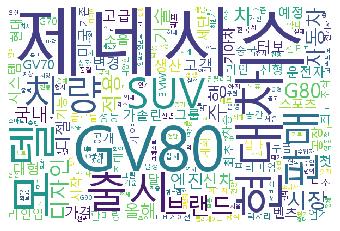

In [350]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('genesis.png')

In [351]:
genesis.to_csv('./magazine/final/genesis_adfn_2.csv', sep='|', encoding = 'utf-8', index = False)